## Import Python Libraries and Modules

In [283]:
#Import python libraries and modules
import pandas as pd
import numpy as np

#Import libraries and modules for vizualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#import scit-learn module to split the dataset into train-test sub-datasets
from sklearn.model_selection import train_test_split

## 1. Load Dataset

In [286]:
#Specify what and where is the data file
filename = "C:/Users/Aleena/Desktop/UNT/big data/FINAL PROJECT/adult_salary.csv"

#Load the data into a Pandas Dataframe
df=pd.read_csv(filename)

## 2. Preprocess Dataset

In [ ]:
# we are dropping 'Fnlwgt' because it was used only to conduct the survey
df.drop('Fnlwgt',inplace=True)

In [291]:
df.dtypes

Age               int64
Emp_type         object
Education        object
Education_num     int64
Marital          object
Occupation       object
Relationship     object
Race             object
Sex              object
Capital_gain      int64
Capital_loss      int64
weekly_hours      int64
Country          object
Income           object
dtype: object

As You can see we have '?' value in some columns - we are going to replace '?' with Nan value

In [295]:
#Importing the data set where '?' is replaced with Nan
#Specify what and where is the data file
filename = "C:/Users/Aleena/Desktop/UNT/big data/FINAL PROJECT/adult_salary.csv"

#Load the data into a Pandas Dataframe
df=pd.read_csv(filename)


In [297]:
print(df.isnull().sum())

Age                 0
Emp_type         2799
Education           0
Education_num       0
Marital             0
Occupation       2809
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
weekly_hours        0
Country           857
Income              0
dtype: int64


Now if we look at the income there is a issue due to typos there are 2 value "<=50K" and "<=50K."which represent the same value
Similarky for ">50K" and ">50K."
WE WILL REPLACE AND MAKE THIS VALUE UNIFORM

In [300]:
value_counts_column1 = df['Income'].value_counts()

print("Count of unique values in 'Income':")
print(value_counts_column1)

Count of unique values in 'Income':
Income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [302]:
#Importing data set with unifromed values
#Specify what and where is the data file
filename = "C:/Users/Aleena/Desktop/UNT/big data/FINAL PROJECT/adult_salary.csv"

#Load the data into a Pandas Dataframe
df=pd.read_csv(filename)

In [304]:
value_counts_column1 = df['Income'].value_counts()

print("Count of unique values in 'Income':")
print(value_counts_column1)

Count of unique values in 'Income':
Income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [306]:
#Lets get the percentage of Nan Values
# Calculate the percentage of NaN values in each column
nan_percentage = df.isnull().mean() * 100

# Display the results
print(nan_percentage)

Age              0.000000
Emp_type         5.730724
Education        0.000000
Education_num    0.000000
Marital          0.000000
Occupation       5.751198
Relationship     0.000000
Race             0.000000
Sex              0.000000
Capital_gain     0.000000
Capital_loss     0.000000
weekly_hours     0.000000
Country          1.754637
Income           0.000000
dtype: float64


In [308]:
#Since the percentage of data conatining nan values is very less and considering the fact that we have 48842 row we can drop these rows with nan values
# List of columns to check for NaN values
columns_to_check = ['Emp_type','Occupation','Country']

df.dropna(subset=columns_to_check, inplace=True)

In [310]:
print(df.isnull().sum())

Age              0
Emp_type         0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64


In [261]:
#Get summary statistics of the numeric variables/attributes of the datset
print(df.describe())

                Age  Education_num  Capital_gain  Capital_loss  weekly_hours
count  45222.000000   45222.000000  45222.000000  45222.000000  45222.000000
mean      38.547941      10.118460   1101.430344     88.595418     40.938017
std       13.217870       2.552881   7506.430084    404.956092     12.007508
min       17.000000       1.000000      0.000000      0.000000      1.000000
25%       28.000000       9.000000      0.000000      0.000000     40.000000
50%       37.000000      10.000000      0.000000      0.000000     40.000000
75%       47.000000      13.000000      0.000000      0.000000     45.000000
max       90.000000      16.000000  99999.000000   4356.000000     99.000000


## 3. Exploratory Data Analysis(EDA)

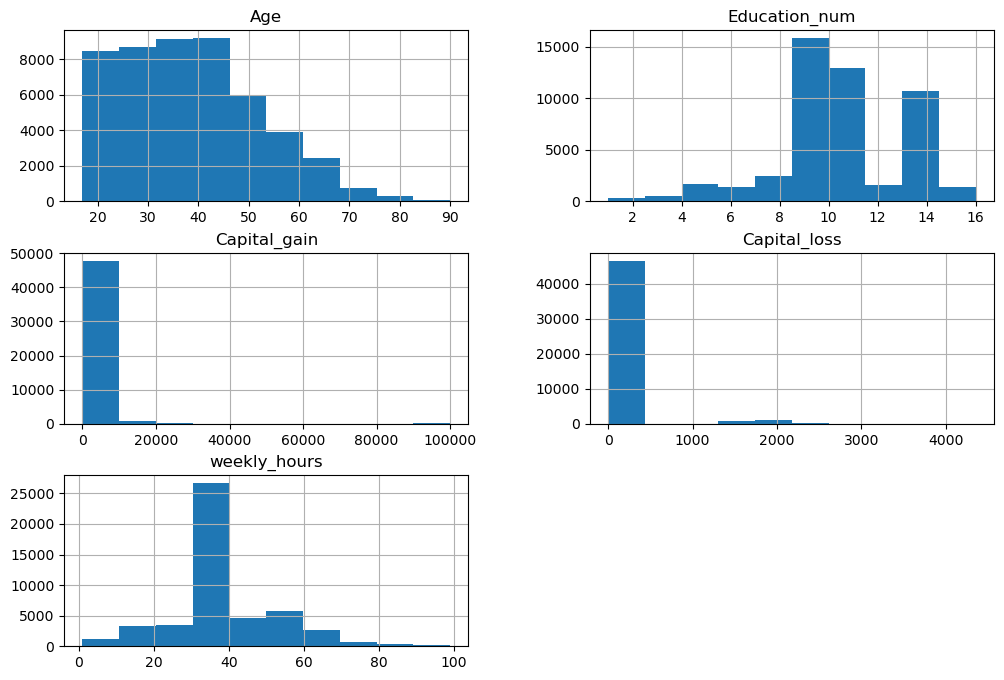

In [216]:
#Plot histogram for each numeric variable/attributr of the dataset
#VIP Notes : the first variable ID is also plotted should be ignored
df.hist(figsize=(12,8))
pyplot.show()

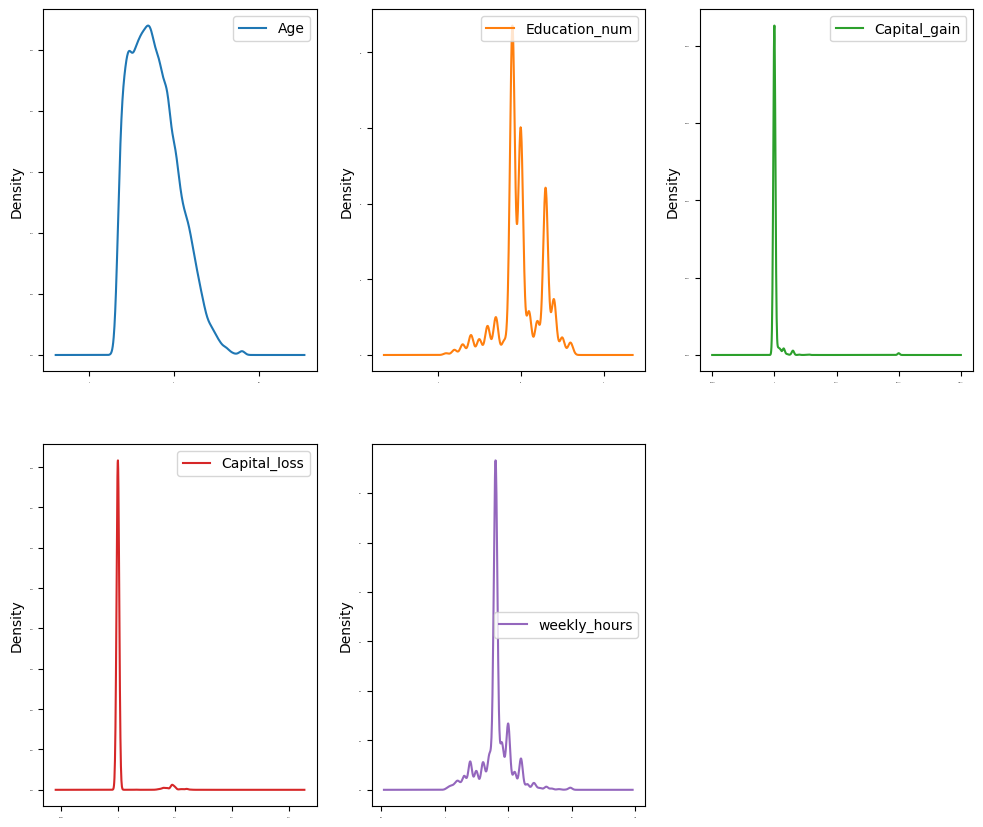

In [8]:
#Density plot
#IMPORTANT NOTES : 5 numeric variables: at least 5 plots -->layout(2,3):2 rows,each row has 3 plots
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=1,figsize=(12,16))
pyplot.show()

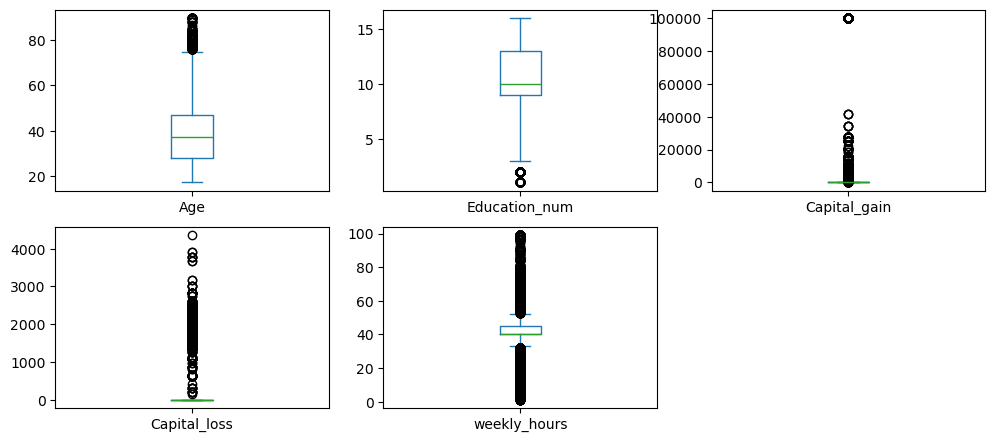

In [52]:
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,figsize=(12,8))
pyplot.show()

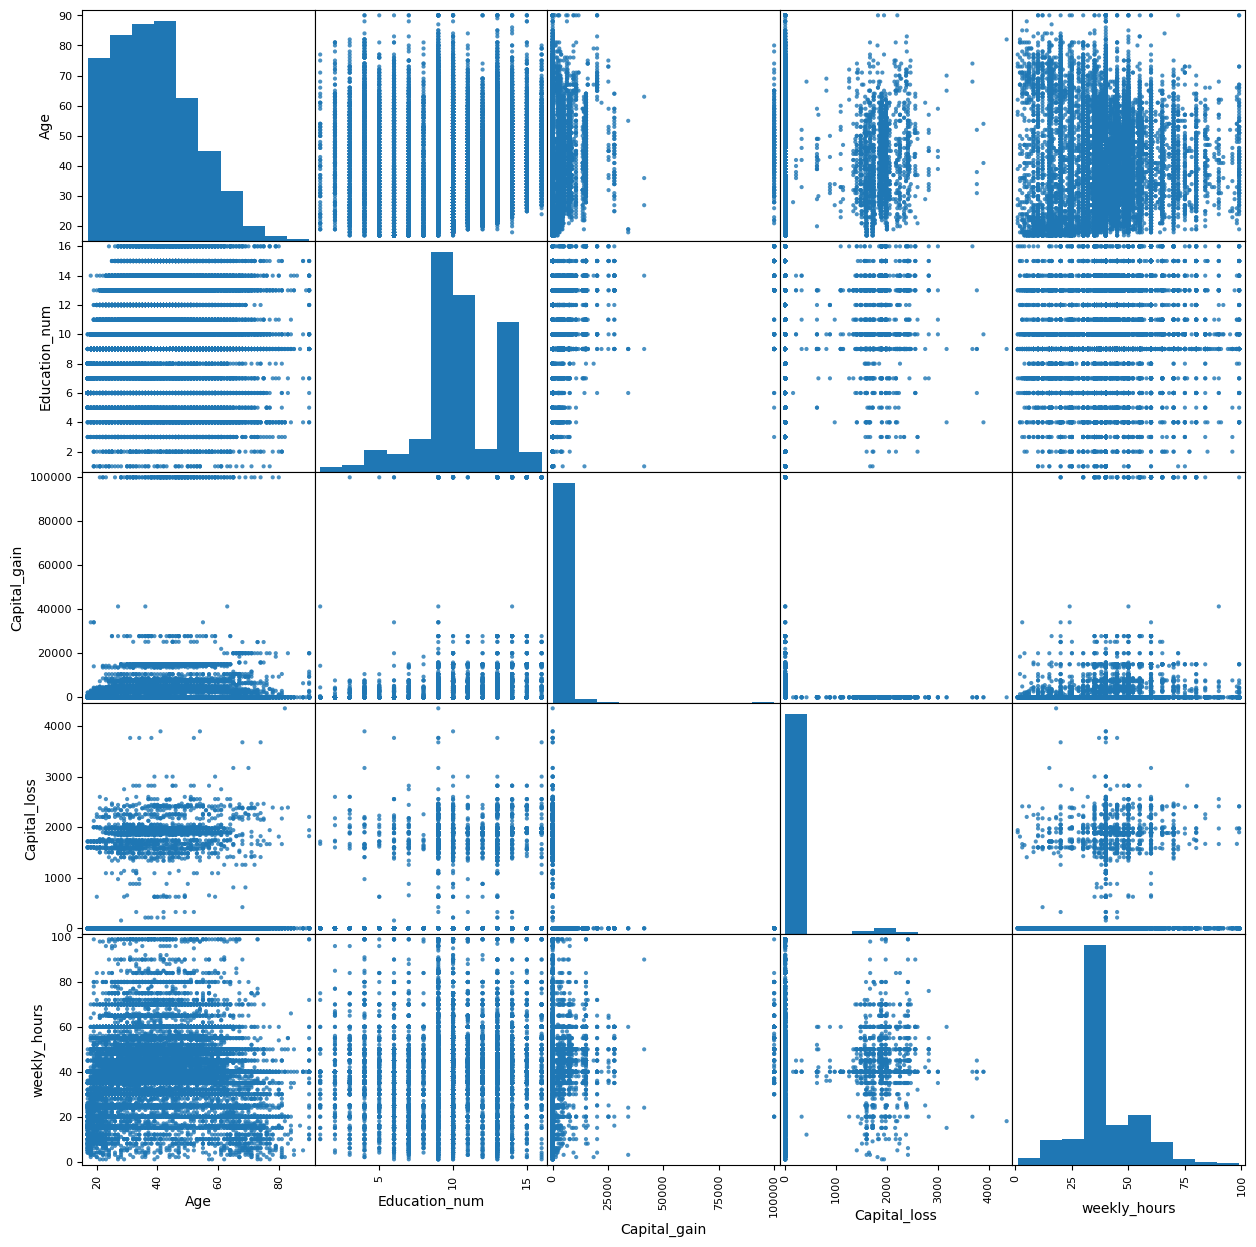

In [53]:
#scatter plot matrix
scatter_matrix(df,alpha=0.8,figsize=(15,15))
pyplot.show()

## 4 Seprate Dataset into Input and Output Arrays

In [312]:


# Identify object columns
object_columns = df.select_dtypes(include='object').columns

# Iterate and encode object columns with categorical codes
for column in object_columns:
    df[column] = pd.Categorical(df[column]).codes

print("DataFrame after encoding:")
print(df.head(8))

DataFrame after encoding:
   Age  Emp_type  Education  Education_num  Marital  Occupation  Relationship  \
0   39         5          9             13        4           0             1   
1   50         4          9             13        2           3             0   
2   38         2         11              9        0           5             1   
3   53         2          1              7        2           5             0   
4   28         2          9             13        2           9             5   
5   37         2         12             14        2           3             5   
6   49         2          6              5        3           7             1   
7   52         4         11              9        2           3             0   

   Race  Sex  Capital_gain  Capital_loss  weekly_hours  Country  Income  
0     4    1          2174             0            40       38       0  
1     4    1             0             0            13       38       0  
2     4    1          

In [314]:
#Store dataframe values into a munpy array
array = df.values

#separate array into input and output components by slicing 
#For X(input)[:,0:13]-->all the rows,columns from 1-4 (5-1)
X=array[:,0:13]
#For Y(input)[:,13] ---> all the rows,column 5
Y=array[:,13]

## 5 Split Input/Output Arrays into Training/Testing Datasets

In [317]:
#Split the dataset --> training sub-dataset: 67%;test sub-dataset:33%
test_size =0.33
#Selection of records to include in which sub-dataset must be done randomly 
#Use this seed for randomization 
seed=7
#Split the dataset (both input and output) into training/testing datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = test_size,random_state=seed)

## 6 Build and Train the Model

In [320]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))








Confusion Matrix:
 [[10088  1080]
 [ 1356  2400]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     11168
           1       0.69      0.64      0.66      3756

    accuracy                           0.84     14924
   macro avg       0.79      0.77      0.78     14924
weighted avg       0.83      0.84      0.83     14924



## 7 Find Accuracy Level

In [275]:
# Get the accuracy of the model
accuracy = rf_classifier.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 83.68%


## 8 Classify/Predict

We are going to predict Income for 2 new records
1. AGE : 38
2. Emp_type :State-gov(5)
3. Educatiom :Bachelors(9)
4. Eduction_number :13
5. Marital:Divorced (0)
6. Occupation : Other-service (3)
7. Relationship: Not-in-family (1)
8. Race: white (4)
9. Sex:Male (1)
10. Capital_gain:0
11. Capital_loss: 0
12. weekly hours :40 
13. Country: usa (38)

In [324]:
rf_classifier.predict([[38,5,9,13,0,3,1,4,1,0,0,40,38]])

array([0], dtype=int64)

We are going to predict Income for 2 new records
1. AGE : 40
2. Emp_type :State-gov(5)
3. Education: HS-grad(11)
4. Eduction_number :9
5. Marital :Divorced (0)
6. Occupation : Other-service (3)
7. Relationship: Not-in-family (1)
8. Race: Black (2)
9. Sex:Male (1)
10. Capital_gain:0
11. Capital_loss: 0
12. weekly hours : 50
13. Country: cuba (4)
    

In [326]:
rf_classifier.predict([[40,5,11,9,0,3,1,4,1,0,0,50,4]])

array([0], dtype=int64)

In [328]:
#Import scit-learn module for K-fold cross validation -algorithm/module evaluation and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import scit-learn module for classification report
from sklearn.metrics import classification_report

In [330]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform K-Fold Cross-Validation (e.g., 5 folds)
cv_scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='accuracy')

# Print the cross-validation scores and average accuracy
print("Cross-validation scores for each fold:", cv_scores)
print("Average accuracy across all folds:", cv_scores.mean())



Cross-validation scores for each fold: [0.84422333 0.83946932 0.84918178 0.84144184 0.83790358]
Average accuracy across all folds: 0.8424439696451156
